In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust_segmentation = pd.read_csv('datasets_42674_74935_Mall_Customers.csv')
cust_segmentation.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
cust_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
cust_segmentation.drop(["CustomerID"], axis = 1, inplace=True)

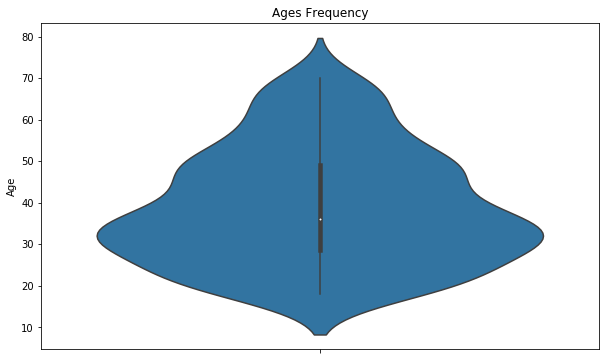

In [7]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=cust_segmentation["Age"])
plt.show()

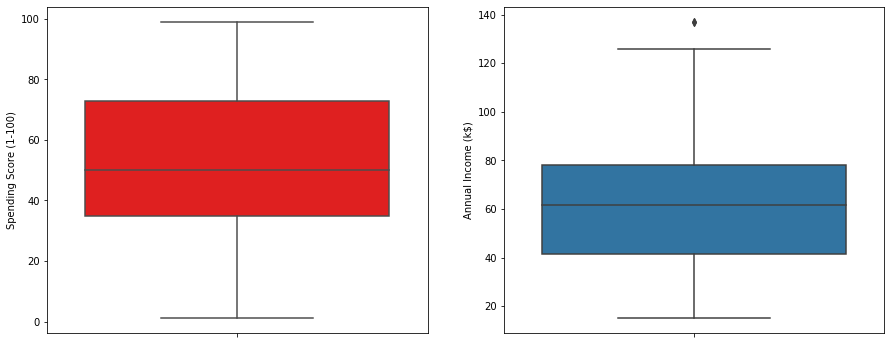

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=cust_segmentation["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=cust_segmentation["Annual Income (k$)"])
plt.show()

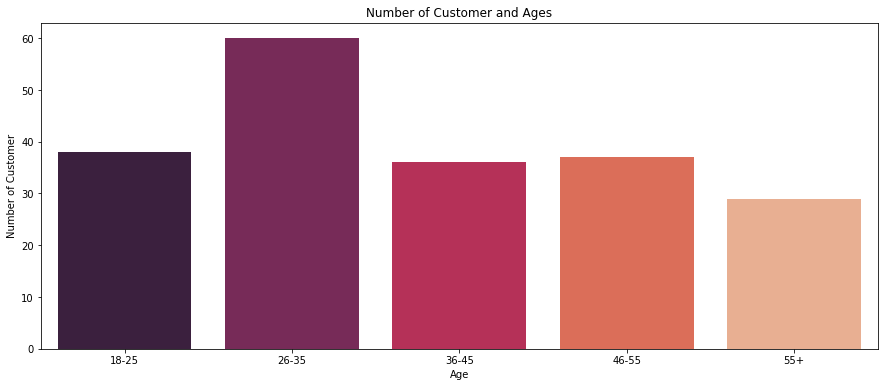

In [10]:
age18_25 = cust_segmentation.Age[(cust_segmentation.Age <= 25) & (cust_segmentation.Age >= 18)]
age26_35 = cust_segmentation.Age[(cust_segmentation.Age <= 35) & (cust_segmentation.Age >= 26)]
age36_45 = cust_segmentation.Age[(cust_segmentation.Age <= 45) & (cust_segmentation.Age >= 36)]
age46_55 = cust_segmentation.Age[(cust_segmentation.Age <= 55) & (cust_segmentation.Age >= 46)]
age55above = cust_segmentation.Age[cust_segmentation.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

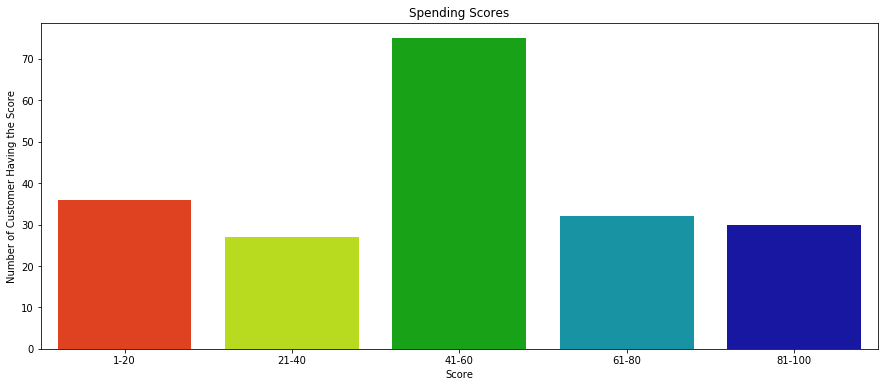

In [11]:
ss1_20 = cust_segmentation["Spending Score (1-100)"][(cust_segmentation["Spending Score (1-100)"] >= 1) & (cust_segmentation["Spending Score (1-100)"] <= 20)]
ss21_40 = cust_segmentation["Spending Score (1-100)"][(cust_segmentation["Spending Score (1-100)"] >= 21) & (cust_segmentation["Spending Score (1-100)"] <= 40)]
ss41_60 = cust_segmentation["Spending Score (1-100)"][(cust_segmentation["Spending Score (1-100)"] >= 41) & (cust_segmentation["Spending Score (1-100)"] <= 60)]
ss61_80 = cust_segmentation["Spending Score (1-100)"][(cust_segmentation["Spending Score (1-100)"] >= 61) & (cust_segmentation["Spending Score (1-100)"] <= 80)]
ss81_100 = cust_segmentation["Spending Score (1-100)"][(cust_segmentation["Spending Score (1-100)"] >= 81) & (cust_segmentation["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

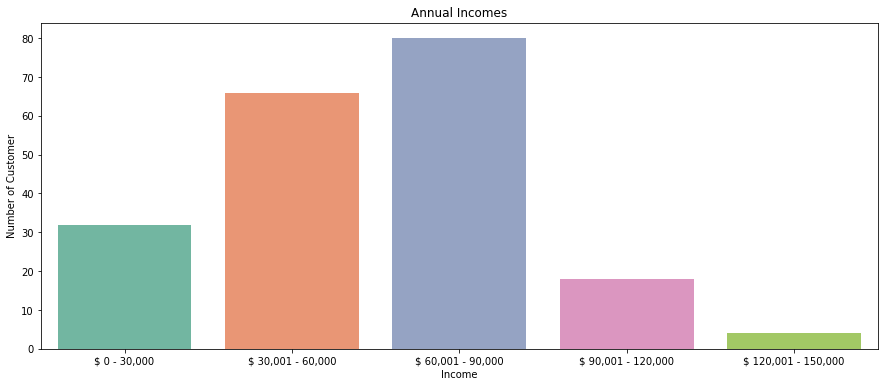

In [13]:
ai0_30 = cust_segmentation["Annual Income (k$)"][(cust_segmentation["Annual Income (k$)"] >= 0) & (cust_segmentation["Annual Income (k$)"] <= 30)]
ai31_60 = cust_segmentation["Annual Income (k$)"][(cust_segmentation["Annual Income (k$)"] >= 31) & (cust_segmentation["Annual Income (k$)"] <= 60)]
ai61_90 = cust_segmentation["Annual Income (k$)"][(cust_segmentation["Annual Income (k$)"] >= 61) & (cust_segmentation["Annual Income (k$)"] <= 90)]
ai91_120 = cust_segmentation["Annual Income (k$)"][(cust_segmentation["Annual Income (k$)"] >= 91) & (cust_segmentation["Annual Income (k$)"] <= 120)]
ai121_150 = cust_segmentation["Annual Income (k$)"][(cust_segmentation["Annual Income (k$)"] >= 121) & (cust_segmentation["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

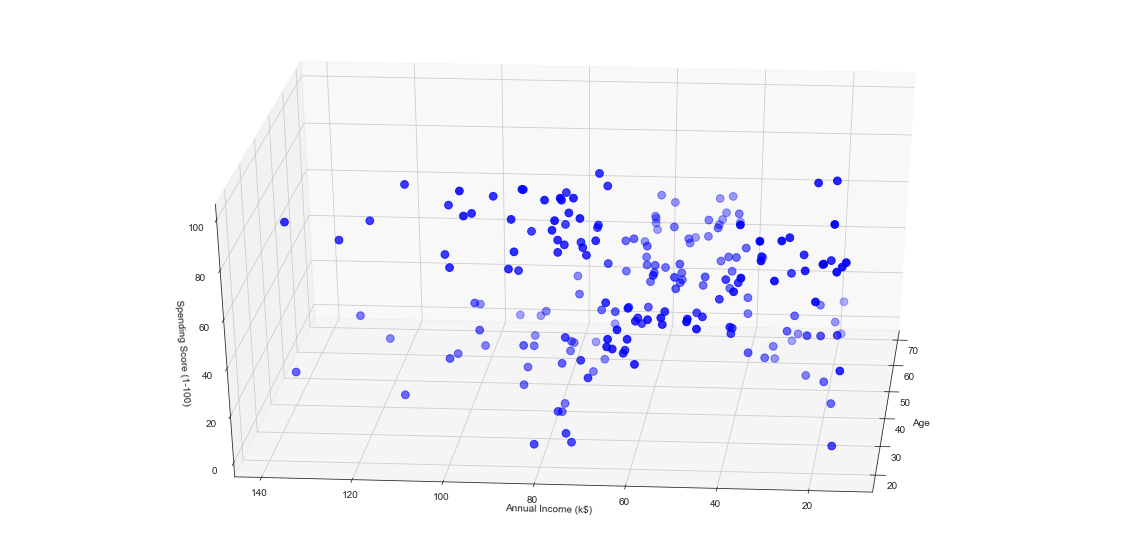

In [15]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_segmentation.Age, cust_segmentation["Annual Income (k$)"], cust_segmentation["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

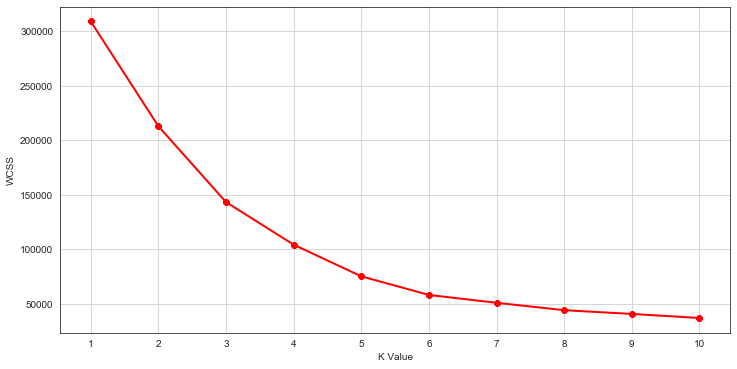

In [16]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cust_segmentation.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

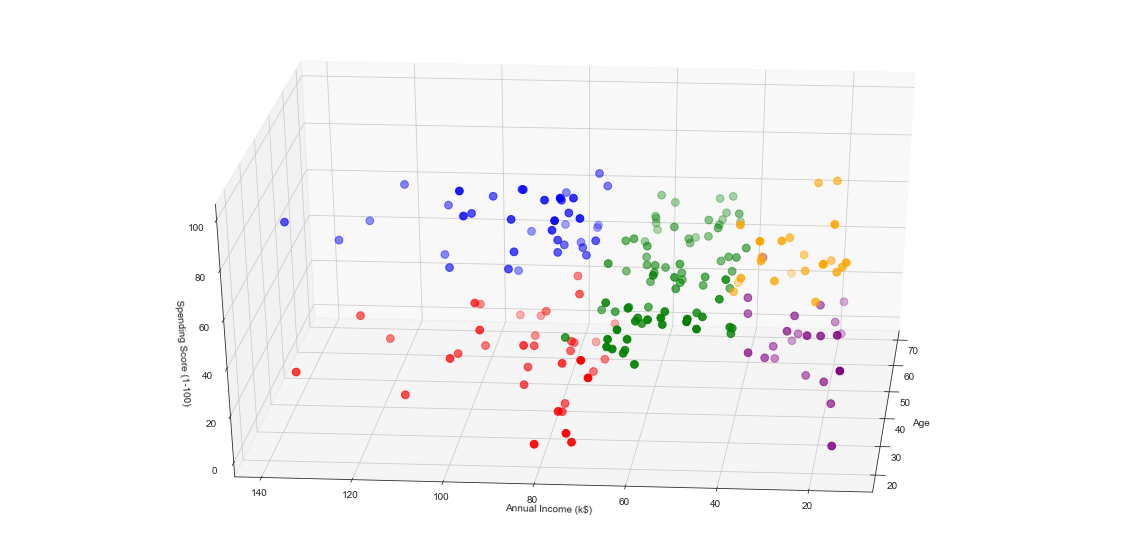

In [17]:
km = KMeans(n_clusters=5)
km.fit(cust_segmentation.iloc[:,1:])
clusters = km.predict(cust_segmentation.iloc[:,1:])

cust_segmentation["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_segmentation.Age[cust_segmentation.label == 0], cust_segmentation["Annual Income (k$)"][cust_segmentation.label == 0], cust_segmentation["Spending Score (1-100)"][cust_segmentation.label == 0], c='blue', s=60)
ax.scatter(cust_segmentation.Age[cust_segmentation.label == 1], cust_segmentation["Annual Income (k$)"][cust_segmentation.label == 1], cust_segmentation["Spending Score (1-100)"][cust_segmentation.label == 1], c='red', s=60)
ax.scatter(cust_segmentation.Age[cust_segmentation.label == 2], cust_segmentation["Annual Income (k$)"][cust_segmentation.label == 2], cust_segmentation["Spending Score (1-100)"][cust_segmentation.label == 2], c='green', s=60)
ax.scatter(cust_segmentation.Age[cust_segmentation.label == 3], cust_segmentation["Annual Income (k$)"][cust_segmentation.label == 3], cust_segmentation["Spending Score (1-100)"][cust_segmentation.label == 3], c='orange', s=60)
ax.scatter(cust_segmentation.Age[cust_segmentation.label == 4], cust_segmentation["Annual Income (k$)"][cust_segmentation.label == 4], cust_segmentation["Spending Score (1-100)"][cust_segmentation.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [18]:
cust_segmentation

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,1


In [19]:
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])